# Copa mundial Rusia 2018 - Dataset

La copa mundial de Rusia 2018 fue un evento que se realizó desde el 14 de junio hasta el 15 de julio de ese mismo año.
La copa consistió en la competencia de 32 naciones.
El campeón fue Francia, que derrotó por 4-2 a Croacia —selección que llegaba por primera vez a la final— y se consagró por segunda vez después de 20 años (en 1998 ganó el Mundial en calidad de anfitrión ante Brasil).

Los datos principales del Mundial 2018:
Sede: Rusia.
Campeón: Francia.
Subcampeón: Croacia.
Fechas: 14 de junio al 15 de julio.
Partidos: 64.
Goles: 169.
Equipos participantes: 32.
Goleador: Harry Kane (6).

<table>
<thead>
  <tr>
    <th>Variable</th>
    <th>Definition</th>
    <th>Example</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td><b>tweet_date_created</b></td>
    <td></td>
    <td>2018-06-28T06:00:16.360000</td>
  </tr>
  <tr>
    <td><b>tweet_id</b></td>
    <td>ID</td>
    <td>142389495503925248</td>
  </tr>
  <tr>
    <td><b>tweet_text</b></td>
    <td>Contenido del tweet</td>
        <td>Se llegó el dia @miseleccionmx  pongan el nombre de México en alto! \nTodos estamos con ustedes.???\n#NadaNosDetiene </td>
  </tr>
  <tr>
    <td><b>lenguage</b></td>
    <td>Idioma</td>
    <td>es</td>
  </tr>
  <tr>
    <td><b>sentiment</b></td>
    <td>Sentimiento final (score más alto)</td>
    <td>Neutral</td>
  </tr>
    <tr>
    <td><b>Neutral</b></td>
    <td>Score neutral</td>
    <td>0.597391</td>
  </tr>
  <tr>
    <td><b>Negative</b></td>
    <td>Score negativo</td>
    <td>0.205260</td>
  </tr>
  <tr>
    <td><b>Positive</b></td>
    <td>Score positivo</td>
    <td>0.085440</td>
  </tr>
  <tr>
    <td><b>Mixed</b></td>
    <td>Score "mixto"</td>
    <td>0.111909</td>
  </tr>
</tbody>
</table>

In [1]:
#Importing everything we need for EDA. Black for linting reasons.
import os
import black
import jupyter_black
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import xml.etree.ElementTree as ET
import pandas as pd
import nltk
import json
nltk.download("stopwords")
nltk.download("punkt")
jupyter_black.load(
    lab=False,
    line_length=80,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
DEBUG:jupyter_black:config: {'line_length': 80, 'target_versions': {<TargetVersion.PY310: 10>}}


In [2]:
csv_file_path = r"C:\Users\Cacu\Desktop\Universidad\Trabajo_Final\DataSets\open-dataset-for-sentiment-analysis-master\betsentiment-ES-tweets-sentiment-worldcup.csv"


# Function to extract sentiment scores from the json str
def extract_sentiment_scores(json_str):
    sentiment_data = json.loads(json_str)
    return (
        sentiment_data["Neutral"],
        sentiment_data["Negative"],
        sentiment_data["Positive"],
        sentiment_data["Mixed"],
    )


# Define data types
dtype_dict = {
    "tweet_date_created": str,
    "tweet_id": int,
    "tweet_text": str,
    "language": str,
    "sentiment": str,
}

try:
    df = pd.read_csv(csv_file_path, encoding="utf-8", dtype=dtype_dict)
except UnicodeDecodeError:
    df = pd.read_csv(csv_file_path, encoding="latin-1", dtype=dtype_dict)

sentiment_scores_list = df["sentiment_score"].map(extract_sentiment_scores)

sentiment_scores_df = pd.DataFrame(
    sentiment_scores_list.tolist(),
    columns=["Neutral", "Negative", "Positive", "Mixed"],
)

df = pd.concat([df, sentiment_scores_df], axis=1)

df.drop("sentiment_score", axis=1, inplace=True)

In [3]:
df

,tweet_date_created,tweet_id,tweet_text,language,sentiment,Neutral,Negative,Positive,Mixed
0,2018-06-17T09:47:48,-136978431,@JoseAMeadeK @miseleccionmx A pero si estás en todo menos en tu campaña y todavía te preguntas porque vas en tercer lugar,es,NEUTRAL,0.597391,0.205260,0.085440,0.111909
1,2018-06-28T06:00:16.360000,-1076408320,"#MarioPereyraDT\n""Tenemos que jugarle a Francia con el mismo equipo"" https://t.co/15ccsyMtOi \n\n#SomosArgentina #Cadena3Mundial https://t.co/aNUZMjDkaR",es,NEUTRAL,0.878757,0.058990,0.049931,0.012322
2,2018-06-07T22:07:43,1008168960,"@miseleccionmx No me pidas eso mi selección, sí a eso voy a los estadios a sacar el FUA.",es,NEGATIVE,0.315568,0.556793,0.056737,0.070902
3,2018-05-31T21:02:10,-1550348286,"Si llega a ser la despedida, no será la mejor...\nPero casi que quiero obligar a todos a mirar 4 años atrás y ver todo lo que, atrás de este tipo, lograron jugadores, dirigentes y todos los que forman parte de @Argentina \nGracias por hacernos mejores (y felices) personas????? https://t.co/amTgw75rdq",es,POSITIVE,0.244512,0.005207,0.686508,0.063773
4,2018-06-26T11:02:06,-1604923392,No se les olvide que nuestro trabajo es construir la dictadura del proletariado.\n#VamosColombia,es,NEUTRAL,0.424387,0.418878,0.085919,0.070817
...,...,...,...,...,...,...,...,...,...
1072456,2018-06-17T14:12:56,-1932234751,Se llegó el dia @miseleccionmx pongan el nombre de México en alto! \nTodos estamos con ustedes.???\n#NadaNosDetiene,es,NEUTRAL,0.394735,0.376690,0.160512,0.068063
1072457,2018-06-17T14:12:56.857000,-1932234751,Se llegó el dia @miseleccionmx pongan el nombre de México en alto! \nTodos estamos con ustedes.???\n#NadaNosDetiene,es,NEUTRAL,0.394735,0.376690,0.160512,0.068063
1072458,2018-05-14T01:54:14,-677941248,"@miseleccionmx @ClubAmerica Oribe Peralta no merece ser de la selección nacional, jugador no es, es ratero por solo cobrar nomina sin rendimiento alguno.",es,NEGATIVE,0.286460,0.603919,0.054673,0.054948
1072459,2018-06-23T15:22:55,-1139363840,mi hermano cree q por hacerme sonidos raros cada que sale un coreano me voy a molestar\n#ElMariachiHaráBailarACorea #COREAndoAlaFinal\n#MexicoVsCorea \n#NadaNosDetiene\n#VamosMéxico,es,NEGATIVE,0.166471,0.757941,0.028321,0.047267


In [4]:
# Read the stopwords from the .txt file and store them in a list
custom_stopwords_file = (
    r"C:\Users\Cacu\Desktop\Universidad\Trabajo_Final\utilities\stopwords.txt"
)
with open(custom_stopwords_file, "r", encoding="utf-8") as file:
    custom_stopwords_list = [line.strip() for line in file]

# Create an empty set to hold the stopwords
custom_stopwords_set = set()

# Add the stopwords from the list to the set
custom_stopwords_set.update(custom_stopwords_list)

In [5]:
# Pre process removing stopwords\
df_01_wordsfreq = df
stop_words = custom_stopwords_set
# convert the column to string type
df_01_wordsfreq["tweet_text"] = df_01_wordsfreq["tweet_text"].astype(str)
df_01_wordsfreq["tweet_text"] = df_01_wordsfreq["tweet_text"].apply(
    lambda x: " ".join(
        [
            word.lower()
            for word in x.split()
            if word.lower() not in stop_words and word.isalpha()
        ]
    )
)

In [6]:
df_01_wordsfreq["tweet_text"] = df_01_wordsfreq["tweet_text"].apply(
    lambda x: nltk.word_tokenize(x)
)

word_list = [word for words in df_01_wordsfreq["tweet_text"] for word in words]

word_freq = Counter(word_list)

top_words = word_freq.most_common(20)

<BarContainer object of 10 artists>

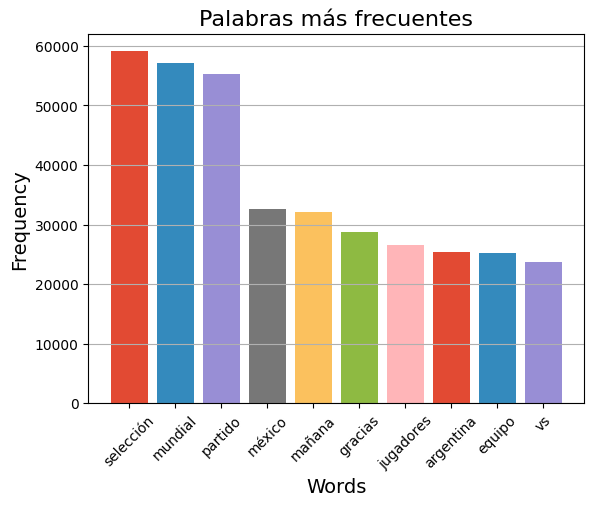

In [7]:
# Get the top 10 most common words
top_words = dict(word_freq.most_common(10))
# Create a bar chart of the top 10 most common words
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Palabras más frecuentes", fontsize=16)
style.use("ggplot")
plt.bar(
    list(top_words.keys()), list(top_words.values()), color=sns.color_palette()
)

Vemos una similitud respecto al EDA realizado para el mundial 2022. A simple vista, parece ser que el dataset tiene efectivamente tweets relacionados al mundial 2018.

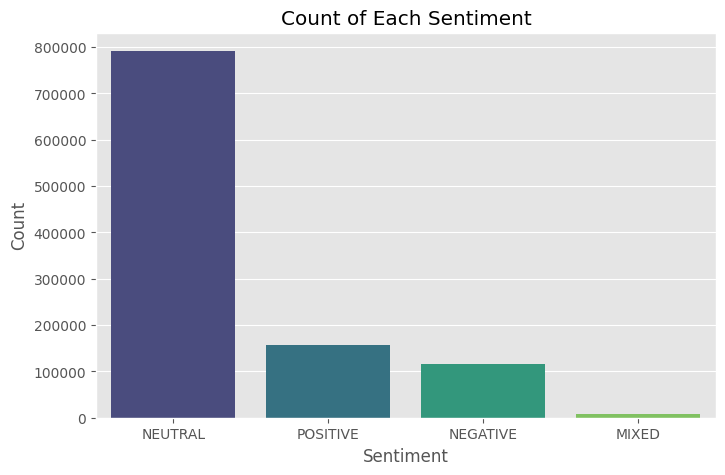

In [8]:
# 1. Count of Each Sentiment
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(
    x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis"
)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Count of Each Sentiment")
plt.show()

La mayoría de tweets dentro de este dataset son neutrales. Al tener también tweets "mixtos", se podría pensar que estos tweets no tuvieron algún tipo de polaridad.
Esto puede ser debido a que en las redes sociales, muchas personas pueden compartir información, noticias, actualizaciones o contenido informativo que no necesariamente lleva una carga emocional intensa. Lo vamos a analizar más adelante en el notebook.

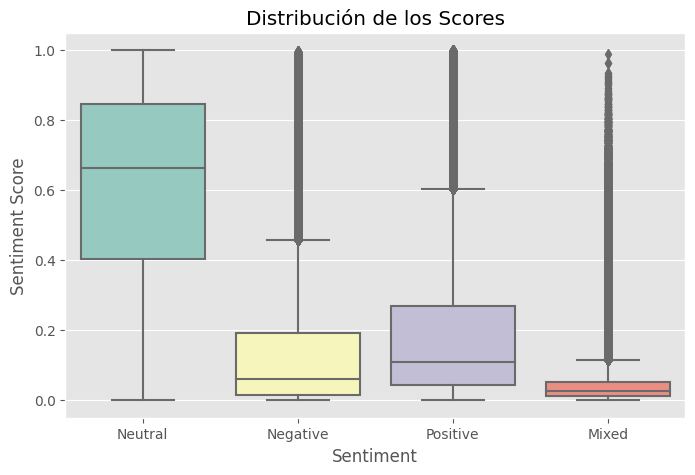

In [9]:
# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df[["Neutral", "Negative", "Positive", "Mixed"]], palette="Set3"
)
plt.xlabel("Sentiment")
plt.ylabel("Sentiment Score")
plt.title("Distribución de los Scores")
plt.show()

Realicé un diagrama de caja para poder observar de manera visual la dispersión, los cuartiles y la mediana de cada puntuación. Se puede apreciar que en el caso de las respuestas "Neutral", existe una mayor variabilidad, y la mediana se encuentra alrededor de 0.6, lo cual parece ser un valor relativamente alto. En contraste, tanto para las respuestas "Negativas" como para las "Positivas", la dispersión es considerablemente menor y las medianas son bastante bajas. En cuanto a las respuestas "Mixtas", es evidente que su mediana está muy próxima a 0, lo cual se explica por la escasa cantidad de ejemplos en el conjunto de datos correspondientes a esta categoría.

In [10]:
# Count the number of rows where 'Positive' sentiment score is greater than 0.5
positive_gt_0_5_count = df[df["Positive"] > 0.5].shape[0]
negative_gt_0_5_count = df[df["Negative"] > 0.5].shape[0]
mixed_gt_0_5_count = df[df["Mixed"] > 0.5].shape[0]
print("Number of 'Positive' rows with score > 0.5:", positive_gt_0_5_count)
print("Number of 'Negative' rows with score > 0.5:", negative_gt_0_5_count)
print("Number of 'Mixed' rows with score > 0.5:", mixed_gt_0_5_count)

Number of 'Positive' rows with score > 0.5: 127408
Number of 'Negative' rows with score > 0.5: 79724
Number of 'Mixed' rows with score > 0.5: 2514


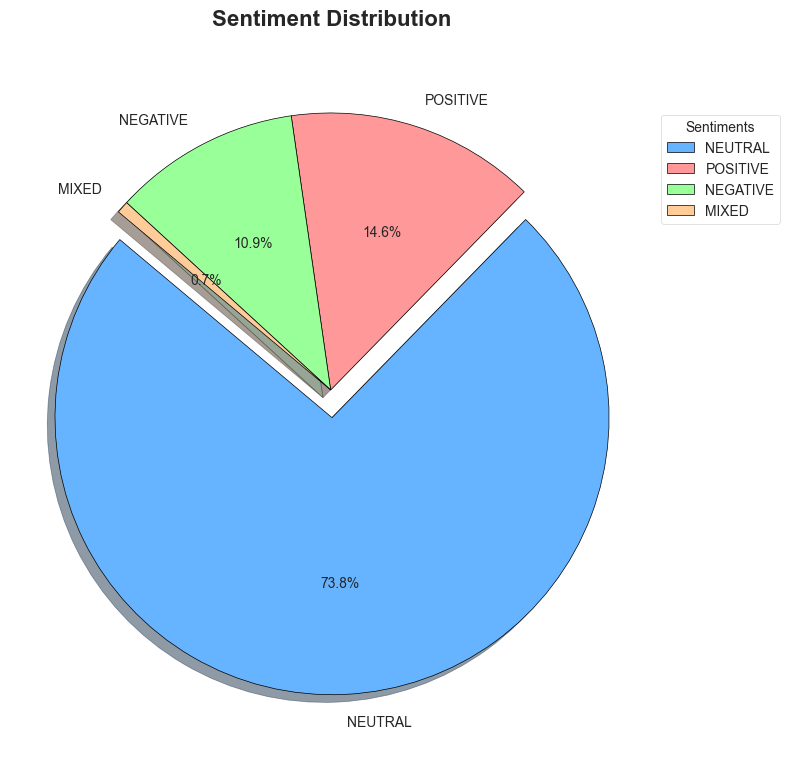

In [11]:
# Count the occurrences of each sentiment category
sentiment_counts = df["sentiment"].value_counts()

# Define custom colors for the pie chart
custom_colors = ["#66b3ff", "#ff9999", "#99ff99", "#ffcc99"]

# Set Seaborn style
sns.set_style("whitegrid")

# Create a pie chart with Seaborn style
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=custom_colors,
    explode=explode,
    shadow=True,
    wedgeprops={"edgecolor": "black"},
)
plt.axis("equal")
plt.title("Sentiment Distribution", fontsize=16, fontweight="bold")
plt.legend(
    sentiment_counts.index,
    title="Sentiments",
    loc="best",
    bbox_to_anchor=(1, 0.9),
)
plt.tight_layout()
plt.show()

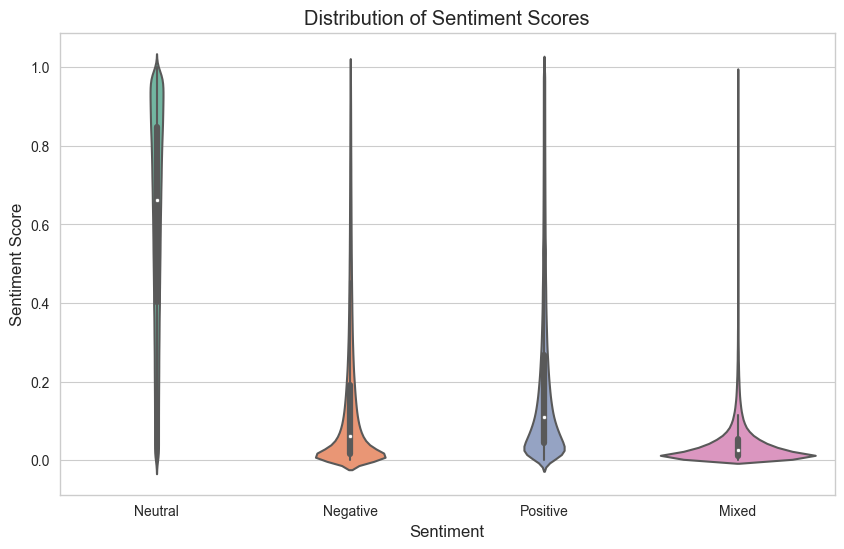

In [12]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df[["Neutral", "Negative", "Positive", "Mixed"]], palette="Set2"
)
plt.xlabel("Sentiment")
plt.ylabel("Sentiment Score")
plt.title("Distribution of Sentiment Scores")
plt.show()

C:\Users\Cacu\AppData\Local\Temp\ipykernel_10652\3712445506.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(time_frequency).mean()


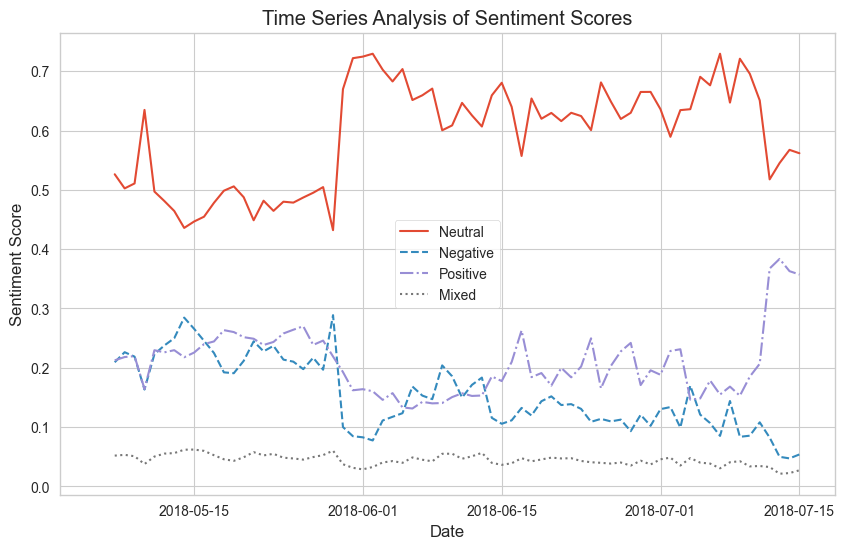

In [13]:
# Convert 'tweet_date_created' column to pandas datetime type
df["tweet_date_created"] = pd.to_datetime(df["tweet_date_created"])

# Set the 'tweet_date_created' column as the DataFrame index
df.set_index("tweet_date_created", inplace=True)

# Resample the DataFrame to a specific time frequency (e.g., daily, weekly, monthly)
# For example, to resample to daily frequency, use 'D'
# For weekly, use 'W', and for monthly, use 'M'
time_frequency = "D"
df_resampled = df.resample(time_frequency).mean()

# Plotting the time series of sentiment scores
plt.figure(figsize=(10, 6))
plt.plot(df_resampled["Neutral"], label="Neutral", linestyle="-")
plt.plot(df_resampled["Negative"], label="Negative", linestyle="--")
plt.plot(df_resampled["Positive"], label="Positive", linestyle="-.")
plt.plot(df_resampled["Mixed"], label="Mixed", linestyle=":")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Time Series Analysis of Sentiment Scores")
plt.legend()
plt.grid(True)
plt.show()

Este gráfico nos brinda la oportunidad de realizar un análisis más profundo de los sentimientos experimentados durante toda la Copa Mundial de Fútbol 2018. En él, se destaca el promedio de las puntuaciones diarias, así como los momentos de máxima intensidad en fechas específicas.

Un ejemplo notable es el pico de tweets negativos registrado el 1 de junio de 2018. Este aumento podría estar relacionado con algún evento particular que merece un análisis más detenido para comprender sus causas y consecuencias.

Además, es evidente que el 15 de julio de 2018 también presenta un pico positivo. Esta alza en las puntuaciones podría atribuirse al emocionante desenlace del torneo, lo que indica que el resultado final impactó positivamente en la percepción general.

En conjunto, este gráfico nos brinda una visión más detallada de las fluctuaciones emocionales a lo largo del torneo, permitiendo identificar momentos de alta intensidad y analizar las razones detrás de dichas variaciones.

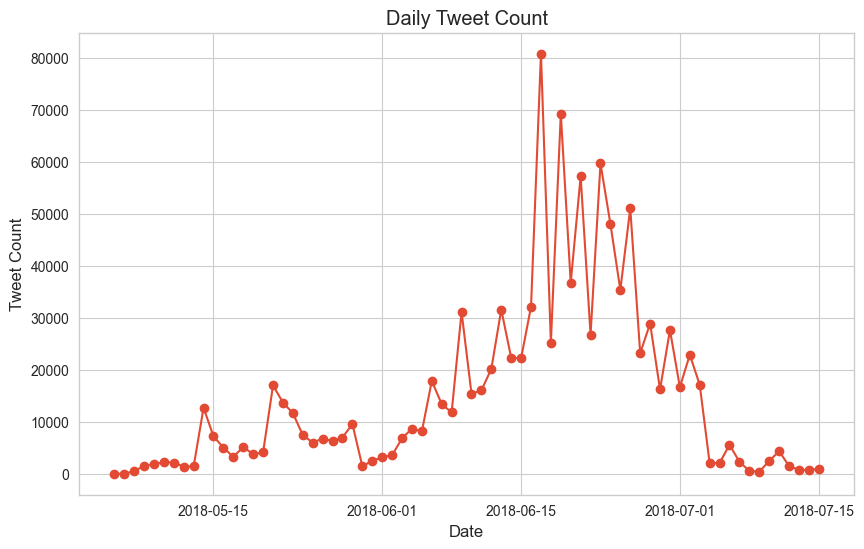

In [14]:
daily_tweet_count = df.resample("D").size()

# Daily tweet count
plt.figure(figsize=(10, 6))
plt.plot(
    daily_tweet_count.index, daily_tweet_count.values, marker="o", linestyle="-"
)
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.title("Daily Tweet Count")
plt.grid(True)
plt.show()

Dentro de este conjunto de datos, es evidente que la recopilación de información alcanzó su punto máximo entre el 15 de junio y el 1 de julio de 2018. Durante este período, se observa un pico notable, especialmente durante los primeros días del torneo. Sin embargo, es crucial llevar a cabo un análisis más profundo para discernir si esta notable expansión de datos corresponde a un aumento genuino en el número de tweets o si puede atribuirse a posibles problemas en la recolección de datos.

In [15]:
df

,tweet_id,tweet_text,language,sentiment,Neutral,Negative,Positive,Mixed
tweet_date_created,,,,,,,,
2018-06-17 09:47:48.000,-136978431,"[campaña, preguntas, vas, tercer]",es,NEUTRAL,0.597391,0.205260,0.085440,0.111909
2018-06-28 06:00:16.360,-1076408320,"[jugarle, francia]",es,NEUTRAL,0.878757,0.058990,0.049931,0.012322
2018-06-07 22:07:43.000,1008168960,"[pidas, estadios, sacar]",es,NEGATIVE,0.315568,0.556793,0.056737,0.070902
2018-05-31 21:02:10.000,-1550348286,"[llega, quiero, obligar, mirar, años, atrás, atrás, lograron, dirigentes, forman, gracias, hacernos, mejores]",es,POSITIVE,0.244512,0.005207,0.686508,0.063773
2018-06-26 11:02:06.000,-1604923392,"[olvide, construir, dictadura]",es,NEUTRAL,0.424387,0.418878,0.085919,0.070817
...,...,...,...,...,...,...,...,...
2018-06-17 14:12:56.000,-1932234751,"[dia, pongan, nombre, méxico]",es,NEUTRAL,0.394735,0.376690,0.160512,0.068063
2018-06-17 14:12:56.857,-1932234751,"[dia, pongan, nombre, méxico]",es,NEUTRAL,0.394735,0.376690,0.160512,0.068063
2018-05-14 01:54:14.000,-677941248,"[oribe, peralta, merece, selección, jugador, ratero, cobrar, nomina, rendimiento]",es,NEGATIVE,0.286460,0.603919,0.054673,0.054948
